In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pygmo import hypervolume
import numpy as np

In [17]:
data = pd.read_csv('../log/evolution_20250514.csv', names = ['dataset', 'nodes', 'inutility', 'disclosure_averseness', 'pareto_nodes', 'seed', 'generation', 'timing'])

In [18]:
data

,dataset,nodes,inutility,disclosure_averseness,pareto_nodes,seed,generation,timing
0,concrete_strength,1481,"[0.010531782065007322, 0.08740442439006241, 0....","[0.4149253731343284, 0.35671641791044784, 0.35...","[93, 93, 83]",0,0,10.999231
1,concrete_strength,1712,"[0.0182939794935382, 0.07901951336186261, 1.13...","[0.4149253731343284, 0.35671641791044784, 0.33...","[93, 93, 130, 63, 67, 109]",0,1,5.735979
2,concrete_strength,1802,"[0.020363280431880237, 0.17774922271943977, 0....","[0.4149253731343284, 0.34527363184079596, 0.32...","[93, 109, 102, 60]",0,2,5.633422
3,concrete_strength,1805,"[0.005596421810634911, 0.22447102126657636, 0....","[0.4149253731343284, 0.3263681592039801, 0.353...","[93, 102, 60, 106, 71]",0,3,6.023865
4,concrete_strength,1928,"[0.241304291445173, 0.07559167618518886, 0.014...","[0.3263681592039801, 0.3288557213930348, 0.356...","[102, 106, 71, 101, 111, 44]",0,4,5.766565
...,...,...,...,...,...,...,...,...
2015,bioav,38918,"[0.007932133958429677, 0.01053178854922654, 4....","[0.4189944134078212, 0.006983240223463664, 0.4...","[1917, 1940, 1921]",4,96,17.882975
2016,bioav,39648,"[0.015072874327813068, 0.0013703668591338314, ...","[0.4189944134078212, 0.4217877094972068, 0.006...","[1917, 1913, 1944, 1905, 1912]",4,97,18.611525
2017,bioav,38793,"[0.0008891331524306656, 0.002782886202753354]","[0.41899441340782123, 0.006983240223463664]","[1912, 1929]",4,98,12.106678
2018,bioav,39241,"[0.03148160790799098, 0.004073706419372547, 0....","[0.006983240223463664, 0.41899441340782123, 0....","[1936, 1920, 1903]",4,99,18.134051


In [5]:
datas = data.dataset.unique()

In [6]:
def calculate_hypervolume(row):
    front = list(zip(eval(row['inutility']), eval(row['disclosure_averseness'])))
    hv = hypervolume(front)
    ref_point = [2, 0.5000001]
    # try:
    return hv.compute(ref_point)
    # except:
    #     return 0
    

In [7]:
def get_percentiles(row):
    x = eval(row['inutility'])
    idxs = []
    for p in [25, 50, 75]:
        pcen=np.percentile(x,p,interpolation='nearest')
        idxs.append(abs(x-pcen).argmin())
    return eval(row['inutility'])[idxs[0]], eval(row['inutility'])[idxs[1]], eval(row['inutility'])[idxs[2]], \
            eval(row['disclosure_averseness'])[idxs[0]], eval(row['disclosure_averseness'])[idxs[1]], eval(row['disclosure_averseness'])[idxs[2]]

In [8]:
data['percentiles'] = data.apply(get_percentiles, axis = 1)

In [9]:
data[['inutlity_25', 'inutlity_50', 'inutlity_75', 'disclosure_averseness_25',
      'disclosure_averseness_50','disclosure_averseness_75']]                   = data['percentiles'].tolist()

In [10]:
data['hypervolume_indicator'] = data.apply(calculate_hypervolume, axis = 1)

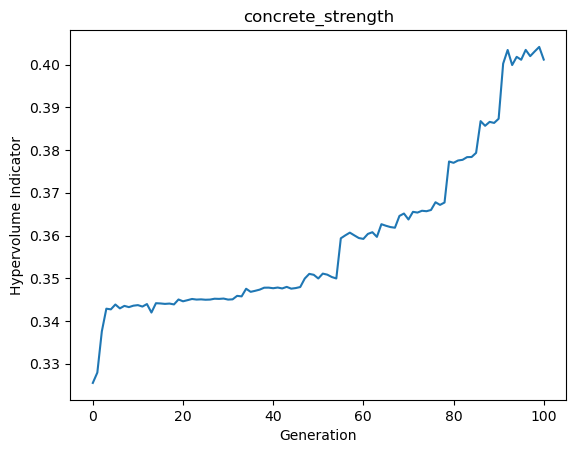

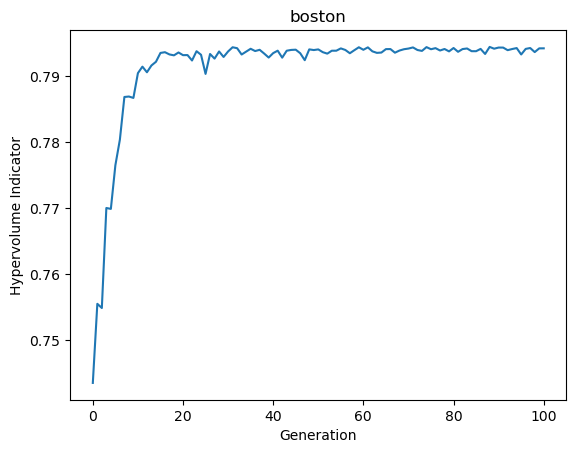

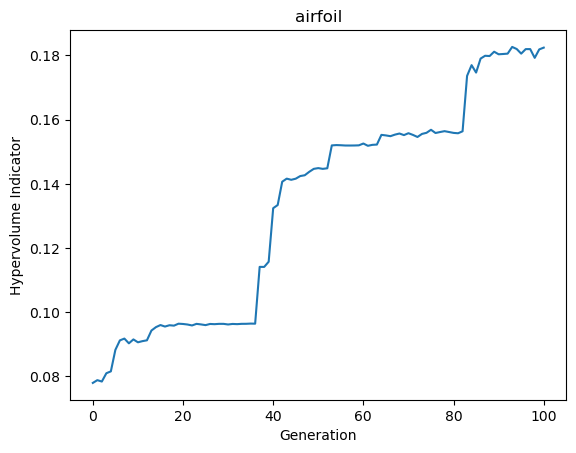

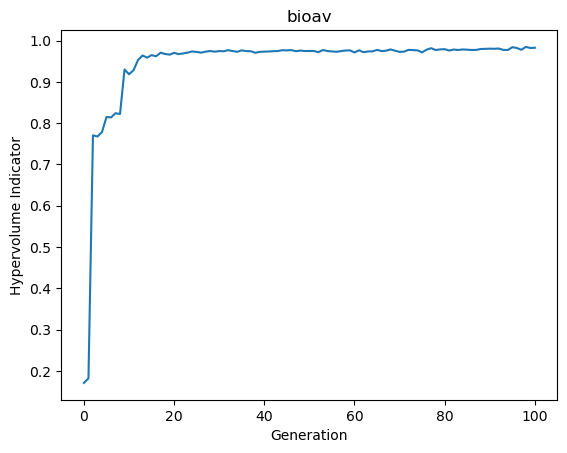

In [11]:
for dataset in datas:
    selected = data[(data['dataset'] == dataset)][['generation', 'hypervolume_indicator']].groupby('generation').median()

    plt.plot(selected.index, selected['hypervolume_indicator'])
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    
    plt.show()


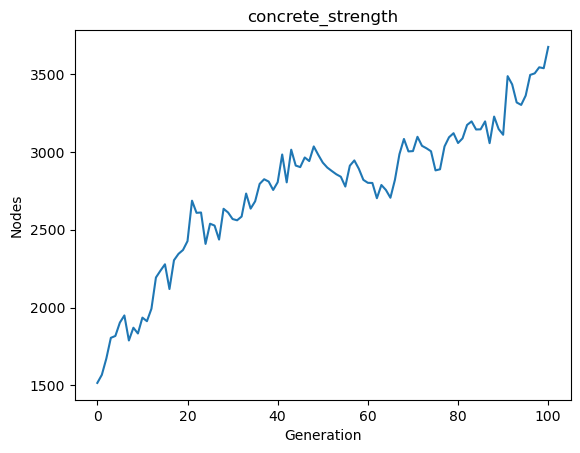

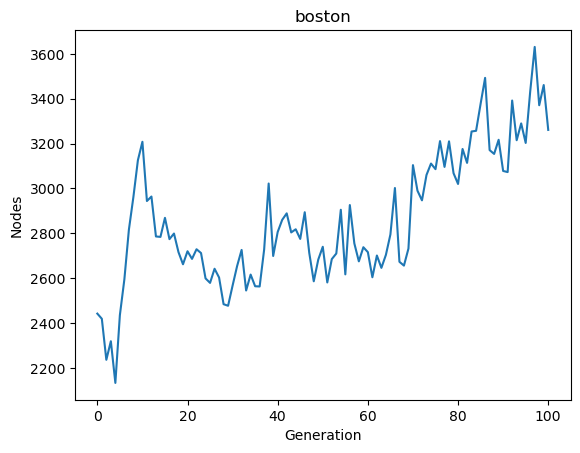

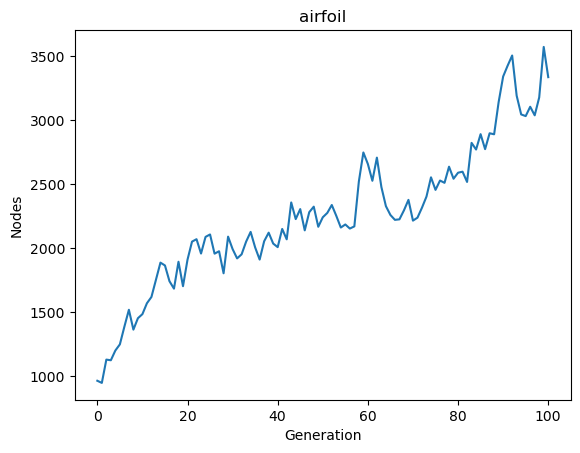

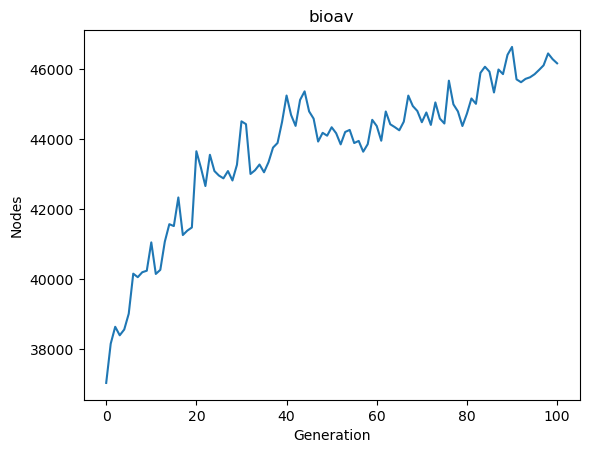

In [12]:
for dataset in datas:
    selected = data[(data['dataset'] == dataset)][['generation', 'nodes']].groupby('generation').median()

    plt.plot(selected.index, selected['nodes'])
    plt.xlabel('Generation')
    plt.ylabel('Nodes')
    plt.title(dataset)
    
    plt.show()


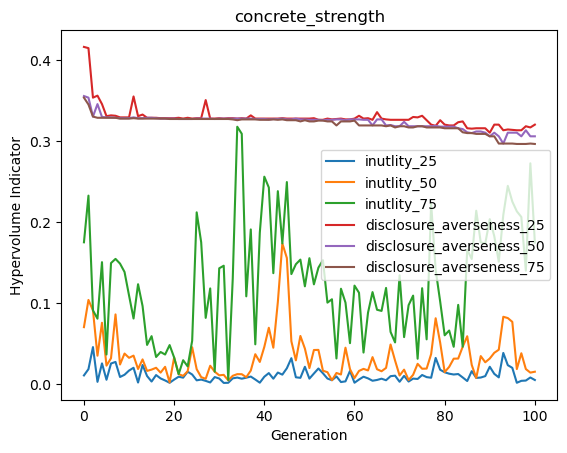

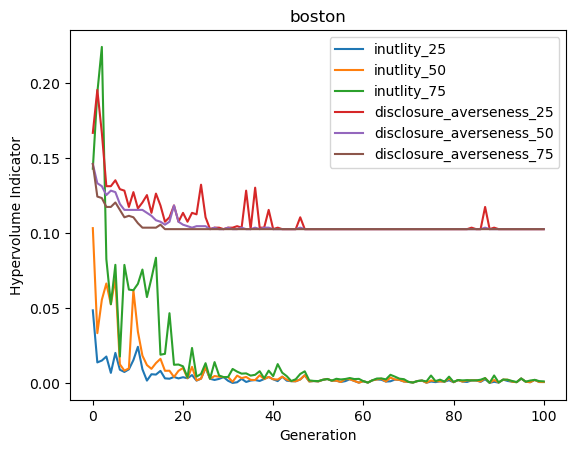

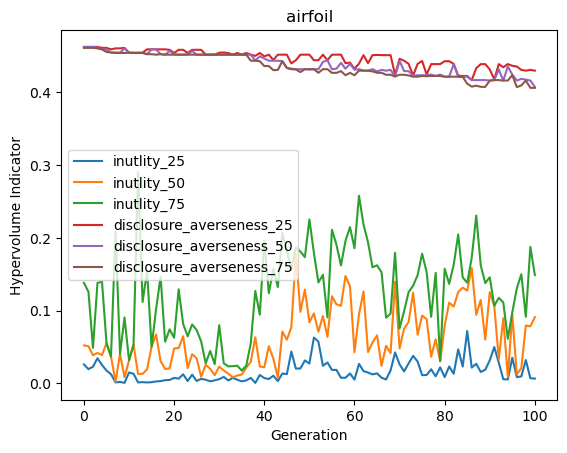

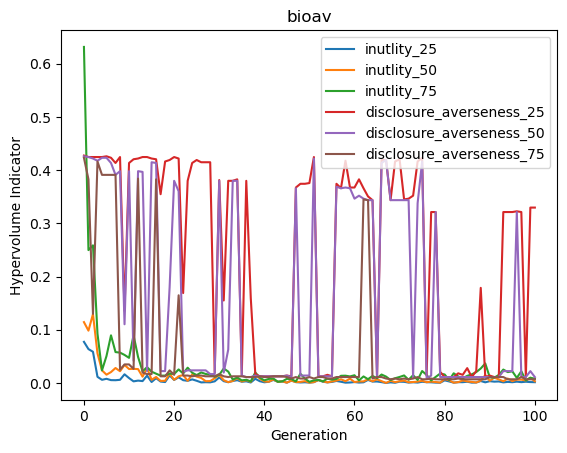

In [13]:
for dataset in datas:
    for metric in ['inutlity_25', 'inutlity_50', 'inutlity_75','disclosure_averseness_25', 'disclosure_averseness_50','disclosure_averseness_75']:
    
        selected = data[(data['dataset'] == dataset)][['generation',metric ]
                                                       ].groupby('generation').median()

        plt.plot(selected.index, selected[metric], label = metric)
    plt.xlabel('Generation')
    plt.ylabel('Hypervolume Indicator')
    plt.title(dataset)
    plt.legend()
    plt.show()


In [14]:
data

,dataset,nodes,inutility,disclosure_averseness,performance,seed,generation,timing,percentiles,inutlity_25,inutlity_50,inutlity_75,disclosure_averseness_25,disclosure_averseness_50,disclosure_averseness_75,hypervolume_indicator
0,concrete_strength,1481,"[0.010531782065007322, 0.08740442439006241, 0....","[0.4149253731343284, 0.35671641791044784, 0.35...","[93, 93, 83]",0,0,10.999231,"(0.010531782065007322, 0.08740442439006241, 0....",0.010532,0.087404,0.175012,0.414925,0.356716,0.353731,0.286031
1,concrete_strength,1712,"[0.0182939794935382, 0.07901951336186261, 1.13...","[0.4149253731343284, 0.35671641791044784, 0.33...","[93, 93, 130, 63, 67, 109]",0,1,5.735979,"(0.0182939794935382, 0.06960936623981759, 0.18...",0.018294,0.069609,0.186997,0.414925,0.396517,0.345274,0.312595
2,concrete_strength,1802,"[0.020363280431880237, 0.17774922271943977, 0....","[0.4149253731343284, 0.34527363184079596, 0.32...","[93, 109, 102, 60]",0,2,5.633422,"(0.056849321492192406, 0.17774922271943977, 0....",0.056849,0.177749,0.177749,0.353731,0.345274,0.345274,0.336554
3,concrete_strength,1805,"[0.005596421810634911, 0.22447102126657636, 0....","[0.4149253731343284, 0.3263681592039801, 0.353...","[93, 102, 60, 106, 71]",0,3,6.023865,"(0.02146174543308549, 0.034891450786749045, 0....",0.021462,0.034891,0.080610,0.356219,0.353731,0.328856,0.342877
4,concrete_strength,1928,"[0.241304291445173, 0.07559167618518886, 0.014...","[0.3263681592039801, 0.3288557213930348, 0.356...","[102, 106, 71, 101, 111, 44]",0,4,5.766565,"(0.025389637039981927, 0.07559167618518886, 0....",0.025390,0.075592,0.241304,0.332836,0.328856,0.326368,0.346119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,bioav,38918,"[0.007932133958429677, 0.01053178854922654, 4....","[0.4189944134078212, 0.006983240223463664, 0.4...","[1917, 1940, 1921]",4,96,17.882975,"(4.91837782212734e-06, 0.007932133958429677, 0...",0.000005,0.007932,0.010532,0.418994,0.418994,0.006983,0.981694
2016,bioav,39648,"[0.015072874327813068, 0.0013703668591338314, ...","[0.4189944134078212, 0.4217877094972068, 0.006...","[1917, 1913, 1944, 1905, 1912]",4,97,18.611525,"(0.0015979456018146432, 0.006309281994081373, ...",0.001598,0.006309,0.015073,0.420391,0.418994,0.418994,0.977821
2017,bioav,38793,"[0.0008891331524306656, 0.002782886202753354]","[0.41899441340782123, 0.006983240223463664]","[1912, 1929]",4,98,12.106678,"(0.0008891331524306656, 0.0008891331524306656,...",0.000889,0.000889,0.002783,0.418994,0.418994,0.006983,0.984815
2018,bioav,39241,"[0.03148160790799098, 0.004073706419372547, 0....","[0.006983240223463664, 0.41899441340782123, 0....","[1936, 1920, 1903]",4,99,18.134051,"(0.004073706419372547, 0.021058182706364337, 0...",0.004074,0.021058,0.031482,0.418994,0.418994,0.006983,0.972733


In [23]:
baselines = {'concrete_strength': [(0.0, 0.5), (0.26611745354031946, 0.1955223880597015)],
             'boston': [(0.0, 0.5), (0.22755657547453573, 0.28952569169960474)],
             'airfoil': [(0.0, 0.5), (0.01132542906707297, 0.4228210246174319)],
             'bioav': [(0.0, 0.49999999999999994), (0.1313547979299871, 0.3589385474860335)]}

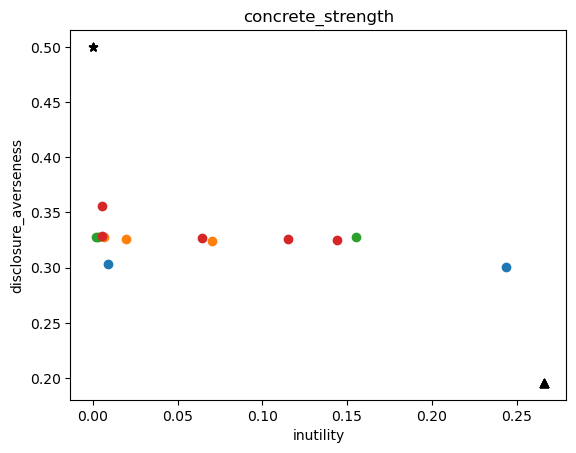

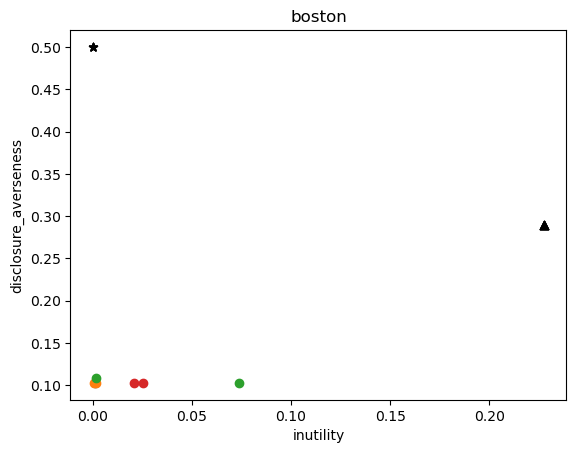

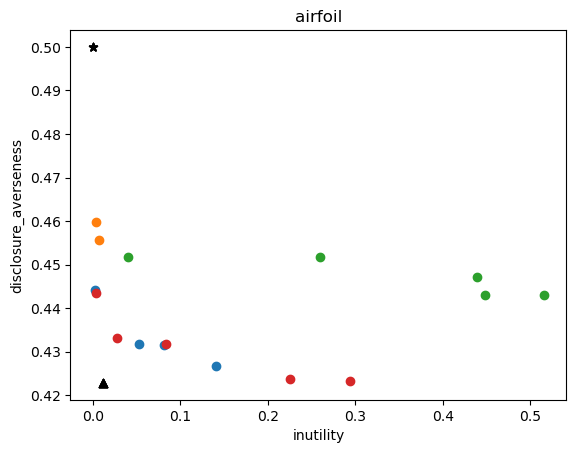

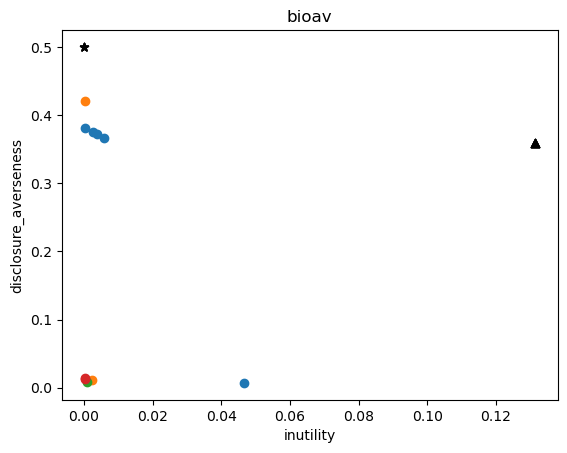

In [24]:
for dataset in datas:
    for seed in range(4):

        selected = data[(data['generation'] == 50) &
            (data['dataset'] == dataset) &
            (data['seed'] == seed)] 
        
        plt.scatter(eval(selected['inutility'].values[0]), eval(selected['disclosure_averseness'].values[0]))

        plt.scatter(baselines[dataset][0][0], baselines[dataset][0][1], marker = "*", color = 'black')
        plt.scatter(baselines[dataset][1][0], baselines[dataset][1][1], marker = "^", color = 'black')
        
    plt.xlabel('inutility')
    plt.ylabel('disclosure_averseness')
    plt.title(dataset)
    plt.show()